In [ ]:
pip install adjustText

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [ ]:
data = "./GWAS_speeding/AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt"
df = pd.read_csv(data, sep="\t")

In [ ]:
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300
...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040


In [ ]:
# Define new columns -log(pvalue)
df["-logp"] = - np.log(df["Pval"])
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584
...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450


In [ ]:
running_pos = 0

cumulative_pos = []

for chrom, group_df in df.groupby("CHR"):
  cumulative_pos.append(group_df["POS"] + running_pos)
  running_pos += group_df["POS"].max()

df["cumulative_pos"] = pd.concat(cumulative_pos)
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205
...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494


In [ ]:
df["SNP number"] = df.index
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos,SNP number
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028,0
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731,1
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092,2
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596,3
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236,11514458
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855,11514459
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464,11514460
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494,11514461


In [ ]:
sample = df.sample(100_000)

21

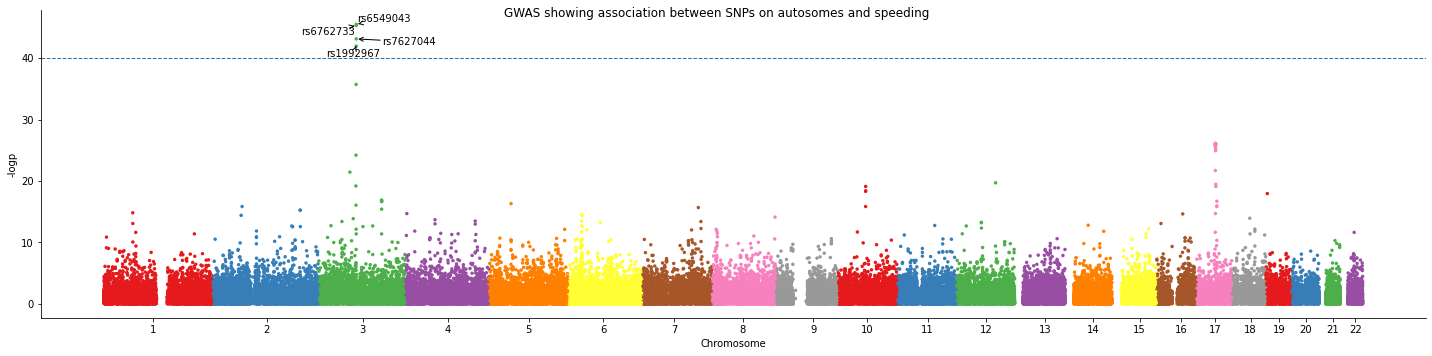

In [ ]:
plot = sns.relplot(
    data = sample,
    x = "cumulative_pos",
    y = "-logp",
    aspect = 4,
    hue = "CHR",
    palette = "Set1",
    linewidth = 0, #remove lines on dots
    s=12, #change dot size
    legend = None,

)

plot.ax.set_xlabel("Chromosome")
plot.ax.set_xticks(sample.groupby("CHR")["cumulative_pos"].median()) #set the tick at the middle of each chromosome
plot.ax.set_xticklabels(df["CHR"].unique())
plot.fig.suptitle("GWAS showing association between SNPs on autosomes and speeding")
plot.ax.axhline(40, linestyle="--", linewidth=1)
annotations = sample[sample["-logp"] > 40].apply(lambda p: plot.ax.annotate(p["MarkerName"], (p["cumulative_pos"], p["-logp"])), axis =1).to_list()

adjust_text(annotations, arrowprops = {"arrowstyle": "->"})

Adapted from: https://www.youtube.com/watch?v=Ej4FkgLOvQ0